# Big Mart Sales Dataset

**Source** : [Big Mark Sales Prediction](https://shahyaseen71.gitbook.io/technocolabs-mini-project/your-task)

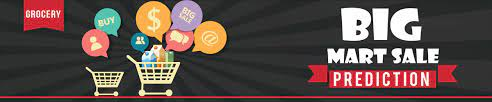

## Objective: To find out the properties of a product, and store which impacts the sales of a product.

### Problem Statement
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

### Importing Libraries



In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [4]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [5]:
#Combine test and train into one file
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 19) (14204, 20)


In [6]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Numerical data summary:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914,NaN,NaN,NaN,NaN,NaN,NaN
std,4.652502,0.051459,62.086938,8.371664,1706.499616,NaN,NaN,NaN,NaN,NaN,NaN
min,4.555000,0.000000,31.290000,1985.000000,33.290000,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.710000,0.027036,94.012000,1987.000000,834.247400,NaN,NaN,NaN,NaN,NaN,NaN
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000,NaN,NaN,NaN,NaN,NaN,NaN
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400,NaN,NaN,NaN,NaN,NaN,NaN
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,NaN,NaN,NaN,NaN,NaN,NaN


# Univariate Analysis

Text(0.5, 1.0, 'Fig-1')

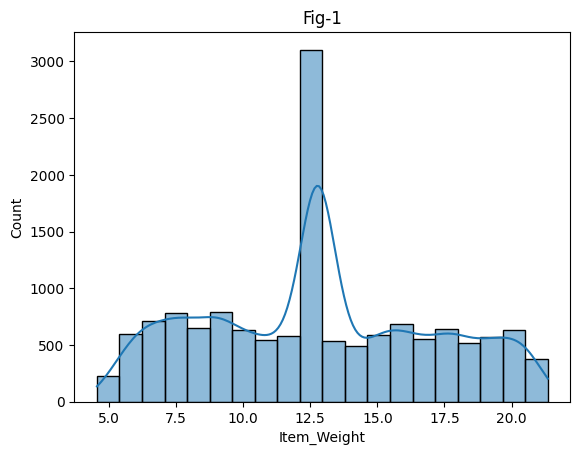

In [52]:
sns.histplot(data=data,x='Item_Weight',bins=20,kde=True)
plt.title('Fig-1')

Text(0.5, 1.0, 'Fig-2')

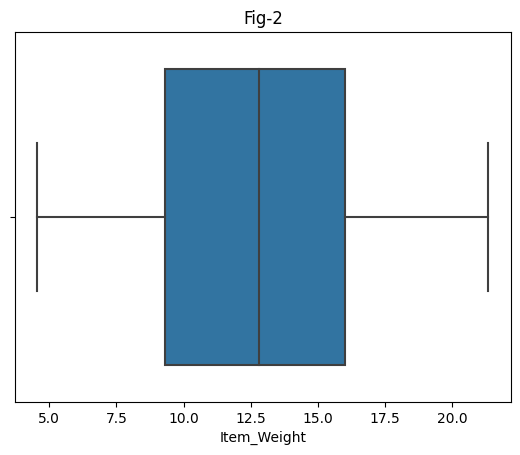

In [57]:
sns.boxplot(data=data,x='Item_Weight')
plt.title('Fig-2')

In [78]:
px.histogram(x=data['Item_Visibility'],title='Fig-5')

* From the above visualization we see that the Item weight is Normally distributed
* There is no Outliers in the Item Weight feature


# Bivariate Analysis

# Data Cleaning

In [8]:
#Check missing values:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                  0
Item_Weight                   2439
Item_Fat_Content                 0
Item_Visibility                  0
Item_Type                        0
Item_MRP                         0
Outlet_Identifier                0
Outlet_Establishment_Year        0
Outlet_Size                   4016
Outlet_Location_Type             0
Outlet_Type                      0
Item_Outlet_Sales             5681
source                           0
Unnamed: 11                  14204
Unnamed: 12                  14204
Unnamed: 13                  14204
Unnamed: 14                  14204
Unnamed: 15                  14204
Unnamed: 16                  14204
Unnamed: 17                  14203
dtype: int64

### Filling missing values

In [9]:
data.Item_Outlet_Sales = data.Item_Outlet_Sales.fillna(data.Item_Outlet_Sales.mean())

In [10]:
data.Item_Weight = data.Item_Weight.fillna(data.Item_Weight.mean())

In [11]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [12]:
data.Outlet_Size = data.Outlet_Size.fillna('Medium')

In [13]:
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                  0
Item_Weight                      0
Item_Fat_Content                 0
Item_Visibility                  0
Item_Type                        0
Item_MRP                         0
Outlet_Identifier                0
Outlet_Establishment_Year        0
Outlet_Size                      0
Outlet_Location_Type             0
Outlet_Type                      0
Item_Outlet_Sales                0
source                           0
Unnamed: 11                  14204
Unnamed: 12                  14204
Unnamed: 13                  14204
Unnamed: 14                  14204
Unnamed: 15                  14204
Unnamed: 16                  14204
Unnamed: 17                  14203
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
 13  Unnamed: 11                0 non-null      flo

In [15]:
#Item type combine:
data['Item_Identifier'].value_counts()
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

### Numerical and One-Hot Coding of Categorical variables

In [16]:
#Import library:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [17]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])

In [18]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Unnamed: 11,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,NaN,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,NaN,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,NaN,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,NaN,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,train,NaN,...,0,1,0,0,0,0,0,0,0,0


In [19]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Unnamed: 11                  float64
Unnamed: 12                  float64
Unnamed: 13                  float64
Unnamed: 14                  float64
Unnamed: 15                  float64
Unnamed: 16                  float64
Unnamed: 17                   object
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Item_Fat_Content_3             uint8
Item_Fat_Content_4             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
O

### Exporting Data

In [20]:
import warnings
warnings.filterwarnings('ignore')
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

# Model Building

In [21]:
# Reading modified data
train2 = pd.read_csv("train_modified.csv")
test2 = pd.read_csv("test_modified.csv")

In [22]:
train2.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,182.0950,OUT010,732.3800,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,994.7052,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [23]:
X_train = train2.drop(['Item_Outlet_Sales', 'Outlet_Identifier','Item_Identifier'], axis=1)
y_train = train2.Item_Outlet_Sales

In [24]:
X_test = test2.drop(['Outlet_Identifier','Item_Identifier'], axis=1)

In [25]:
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Fat_Content_3,Item_Fat_Content_4,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.016047,249.8092,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.000000,182.0950,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [26]:
y_train.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

## Linear Regression Model:

In [27]:
# Fitting Multiple Linear Regression to the training set
from sklearn.linear_model import  LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predicting the test set results
y_pred = regressor.predict(X_test)

In [29]:
y_pred

array([1848.53604783, 1472.81670435, 1875.65285894, ..., 1809.18796433,
       3565.6645235 , 1267.46171871])

In [30]:
import warnings
warnings.filterwarnings('ignore')
# Measuring Accuracy
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


In [31]:
lr_accuracy = round(regressor.score(X_train,y_train) * 100,2)
lr_accuracy

56.36

In [32]:
r2_score(y_train, regressor.predict(X_train))

0.5635892777270479

In [33]:
import warnings
warnings.filterwarnings('ignore')
#Perform cross-validation:
cv_score = cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
import sklearn.metrics as metrics

In [34]:
print(np.sqrt(np.abs(cv_score)))

[1150.93927648 1118.68414103 1112.89657923 1126.30724065 1140.59735737]


In [35]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))

RMSE : 1127


In [36]:
submission = pd.DataFrame({
'Item_Identifier':test2['Item_Identifier'],
'Outlet_Identifier':test2['Outlet_Identifier'],
'Item_Outlet_Sales': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [37]:
submission.to_csv('submission1.csv',index=False)

## Random Forest Model:

In [38]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50,n_jobs=4)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=50, n_jobs=4)

In [39]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([1649.36141145, 1357.98721345,  596.78084654, ..., 1931.21617405,
       3659.83712027, 1286.89364449])

In [40]:
rf_accuracy = round(regressor.score(X_train,y_train),2)
rf_accuracy

0.61

In [41]:
r2_score(y_train, regressor.predict(X_train))

0.6127680745474818

In [42]:
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(np.sqrt(np.abs(cv_score)))

[1099.79014207 1077.51140562 1077.68573229 1069.23300174 1084.14166449]


In [43]:
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, regressor.predict(X_train))))

RMSE : 1062


In [44]:
submission = pd.DataFrame({
'Item_Identifier':test2['Item_Identifier'],
'Outlet_Identifier':test2['Outlet_Identifier'],
'Item_Outlet_Sales': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [45]:
submission.to_csv('submission3.csv',index=False)

# XG Boost

In [46]:
from sklearn.metrics import mean_absolute_error as MAE
from xgboost import XGBRegressor
xg= XGBRegressor()


In [47]:
xg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [48]:
Y_pred_xg= xg.predict(X_test)

In [49]:
r2_score(y_pred,Y_pred_xg)

0.9016881237694585

In [50]:
print(r2_score(y_pred,Y_pred_xg))
print(MAE(y_pred,Y_pred_xg))
print(np.sqrt(mean_squared_error(y_pred,Y_pred_xg)))

0.9016881237694585
270.39780383750593
416.7793597552863


In [51]:
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=500, objective='reg:linear', booster='gbtree')
 
#Printing all the parameters of XGBoost
print(RegModel)
 
#Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)
 
#Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))
 
#Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_pred - prediction) / y_pred)) * 100))

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)
[04:55:48] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
R2 Value: 0.6928870406814505
Accuracy 89.12868672113794
